In [2]:
import os
import pandas as pd
import numpy as np

# Defines dataset directory
dataset_directory = "dataset"
raw_dataset_directory = os.path.join(dataset_directory, "DATA01/01")

# Processes raw dataset txt files into a singular, combined CSV

In [28]:
# Initialize a sanity dataframe and empty list
all_dfs = []
sanity_df = pd.read_csv(os.path.join(raw_dataset_directory, "01013500_05_model_output.txt"), sep='\s+')

# There are multiple models for each location. For now just process for one
target_model_type = "05"

# Iterates over every file in the raw dataset directory
for file_name in os.listdir(raw_dataset_directory):
    location_id = file_name.split('_')[0]
    model_type = file_name.split('_')[1]

    # Skip over file if it is not of the targetted model type
    if target_model_type != model_type:
        continue

    if file_name.endswith("_model_output.txt"):
        current_df = pd.read_csv(os.path.join(raw_dataset_directory, file_name), sep='\s+')

        # Print a warning as to keep track of any instances of date misalignments in the future
        if current_df.shape != sanity_df.shape:
            print(f"Warning, {file_name} has the shape of {current_df.shape}")
            print(f"when it should have a shape of {sanity_df.shape}\n")

            # If there aren't the same number of columns, error out
            assert (current_df.shape[1] == sanity_df.shape[1])

        # Adds a location ID column and appends the dataframe to a list to be combined later
        current_df["locationID"] = location_id
        all_dfs.append(current_df)


# Combines all the individual dataframes together
combined_df = pd.concat(all_dfs, ignore_index=True)
print(f"Number of Unique Locations: {len(all_dfs)}\n")
total_memory_usage = combined_df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"\nTotal memory usage for the DataFrame: {total_memory_usage:.2f} MB")

# Saves into a new csv
combined_df.to_csv(os.path.join(dataset_directory, f"combined_data_{target_model_type}.csv"), index=False)

print(combined_df.shape)
combined_df.head()

Warning, 01195100_05_model_output.txt has the shape of (11780, 12)
when it should have a shape of (12510, 12)

Number of Unique Locations: 27


Total memory usage for the DataFrame: 51.75 MB
(337040, 13)


,YR,MNTH,DY,HR,SWE,PRCP,RAIM,TAIR,PET,ET,MOD_RUN,OBS_RUN,locationID
0,1980,10,1,12,0.0,3.10,3.10,6.080,1.0883,1.0828,0.0216,0.5510,01013500
1,1980,10,2,12,0.0,4.24,4.24,10.530,1.2687,1.2624,0.0845,0.5607,01013500
2,1980,10,3,12,0.0,8.02,8.02,11.835,1.1867,1.1807,0.1802,0.5586,01013500
3,1980,10,4,12,0.0,15.27,15.27,7.380,1.0033,0.9983,0.4370,0.6712,01013500
4,1980,10,5,12,0.0,8.48,8.48,4.800,0.8536,0.8493,0.7372,0.8216,01013500


# Import the dataset and select desired attributes

In [3]:
# Read in the combined CSV
combined_df = pd.read_csv(os.path.join(dataset_directory, "combined_data_05.csv"))
print(combined_df.shape)
combined_df.head(10)

(337040, 13)


,YR,MNTH,DY,HR,SWE,PRCP,RAIM,TAIR,PET,ET,MOD_RUN,OBS_RUN,locationID
0,1980,10,1,12,0.0,3.10,3.10,6.080,1.0883,1.0828,0.0216,0.5510,1013500
1,1980,10,2,12,0.0,4.24,4.24,10.530,1.2687,1.2624,0.0845,0.5607,1013500
2,1980,10,3,12,0.0,8.02,8.02,11.835,1.1867,1.1807,0.1802,0.5586,1013500
3,1980,10,4,12,0.0,15.27,15.27,7.380,1.0033,0.9983,0.4370,0.6712,1013500
4,1980,10,5,12,0.0,8.48,8.48,4.800,0.8536,0.8493,0.7372,0.8216,1013500
5,1980,10,6,12,0.0,0.00,0.00,5.410,0.8797,0.8753,0.9092,0.8671,1013500
6,1980,10,7,12,0.0,0.00,0.00,6.405,0.9653,0.9567,0.9749,0.9115,1013500
7,1980,10,8,12,0.0,2.10,2.10,7.675,1.0825,1.0691,1.0028,0.9483,1013500
8,1980,10,9,12,0.0,3.55,3.55,5.480,0.9270,0.9211,1.0104,0.9634,1013500
9,1980,10,10,12,0.0,0.00,0.00,3.670,0.9403,0.9356,1.0272,0.9504,1013500


In [4]:
# Combines the date columns into one
combined_df["date"] = pd.to_datetime(combined_df[["YR", "MNTH", "DY"]].astype(str).agg('-'.join, axis=1), format="%Y-%m-%d")
combined_df = combined_df.drop(["YR", "MNTH", "DY", "HR"], axis=1)

# Drops columns that we do not want
combined_df = combined_df.drop(["SWE", "RAIM", "TAIR", "PET", "ET", "MOD_RUN"], axis=1)

print(combined_df.shape)
combined_df.head(10)

(337040, 4)


,PRCP,OBS_RUN,locationID,date
0,3.10,0.5510,1013500,1980-10-01
1,4.24,0.5607,1013500,1980-10-02
2,8.02,0.5586,1013500,1980-10-03
3,15.27,0.6712,1013500,1980-10-04
4,8.48,0.8216,1013500,1980-10-05
5,0.00,0.8671,1013500,1980-10-06
6,0.00,0.9115,1013500,1980-10-07
7,2.10,0.9483,1013500,1980-10-08
8,3.55,0.9634,1013500,1980-10-09
9,0.00,0.9504,1013500,1980-10-10


In [6]:
# Combine the rows together
new_df = combined_df.pivot(index='date', columns='locationID')

# Reminder: Location 1195100 contains 2 years worth of data less than other locations, therefore we must truncate all other
# locations in order to keep the input size consistent.
new_df = new_df.dropna()
new_df = new_df.reset_index()

# New columns are in tuple form (attribute, locationID), therefore fix that
new_df.columns = [f'{col[0]}.{col[1]}' if col[0] != "date" else "date" for col in new_df.columns]

print(new_df.shape)
new_df.head(10)

(11780, 55)


,date,PRCP.1013500,PRCP.1022500,PRCP.1030500,PRCP.1031500,PRCP.1047000,PRCP.1052500,PRCP.1054200,PRCP.1055000,PRCP.1057000,...,OBS_RUN.1139800,OBS_RUN.1142500,OBS_RUN.1144000,OBS_RUN.1162500,OBS_RUN.1169000,OBS_RUN.1170100,OBS_RUN.1181000,OBS_RUN.1187300,OBS_RUN.1195100,OBS_RUN.4296000
0,1982-10-01,7.21,0.00,5.73,0.00,0.00,0.21,0.00,0.00,0.00,...,0.2534,0.1983,0.2493,0.3410,0.2548,0.2511,0.2011,0.1520,0.1098,0.4958
1,1982-10-02,5.56,2.25,4.91,2.51,2.23,6.12,1.78,2.31,0.00,...,0.2534,0.2045,0.2287,0.3118,0.2336,0.2214,0.1810,0.1330,0.1032,0.4415
2,1982-10-03,1.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.2429,0.2045,0.2397,0.2728,0.2124,0.1986,0.1709,0.1187,0.0982,0.4183
3,1982-10-04,0.00,0.01,0.72,0.00,0.00,0.00,0.00,0.00,0.00,...,0.2323,0.2045,0.2260,0.2436,0.2017,0.1986,0.1609,0.1045,0.0982,0.3951
4,1982-10-05,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.2217,0.1890,0.2068,0.2192,0.1911,0.1917,0.1609,0.0950,0.1098,0.3563
5,1982-10-06,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,...,0.2217,0.1890,0.1945,0.2046,0.1911,0.1826,0.2312,0.0902,0.1215,0.3408
6,1982-10-07,0.00,0.00,0.21,0.00,0.00,0.70,0.00,0.00,0.00,...,0.2217,0.1890,0.1876,0.1949,0.1805,0.1826,0.2614,0.0807,0.1215,0.3176
7,1982-10-08,6.42,5.38,6.77,8.49,9.57,17.38,31.97,14.69,19.66,...,1.3727,0.8676,0.4150,0.3410,0.2655,0.2511,0.3619,0.1520,0.1581,0.9605
8,1982-10-09,4.04,6.12,5.37,7.29,6.16,8.81,7.76,6.05,7.84,...,0.8025,0.7436,1.0341,0.9255,0.6796,0.4337,1.8297,1.4247,0.3328,1.6732
9,1982-10-10,0.00,0.00,0.05,1.50,2.62,0.00,5.85,3.58,2.50,...,0.4857,0.5887,0.7190,1.0230,0.5415,0.4337,1.0355,1.0448,0.3827,1.0535


# Augment the entries with a rolling window

Note: timeshift parameter is inclusive, meaning a timeshift of 7 means it will consider 7 days in the past, including the current day.
Meaning a timeshift of 7 would actually be a window of size 8.

In [7]:
def create_rolling_window(df, index_column, window_size):
    new_X, new_Y = [], []
    date_column = df[index_column][window_size:]
    date_column = date_column.reset_index(drop=True)
    
    df = df.drop(index_column, axis=1).to_numpy()
    for i in range(len(df) - window_size):
        new_row = [row for row in df[i:i+window_size]]
        new_X.append(new_row)
        new_Y.append(df[i+window_size])
    return np.array(new_X), np.array(new_Y), date_column

X, Y, date_index = create_rolling_window(new_df, index_column="date", window_size=7)
print(X.shape, Y.shape)

(11773, 7, 54) (11773, 54)


In [12]:
# Given a particular year, split the data for training and testing
index_at_split = date_index.index[date_index > "2010"][0]

# Separate features and targets for training data
X_train = X[:index_at_split]
Y_train = Y[:index_at_split]
Y_train_dates = date_index[:index_at_split]

# Separate features and targets for testing data
X_test = X[index_at_split:]
Y_test = Y[index_at_split:]
Y_test_dates = date_index[index_at_split:]

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(9948, 7, 54) (1825, 7, 54) (9948, 54) (1825, 54)


In [101]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = X_scaler.fit_transform(X_train.reshape(-1, X_train.shape[1] * X_train.shape[2]))
X_train_scaled = X_train_scaled.reshape(-1, X_train.shape[1], X_train.shape[2])
X_test_scaled = X_scaler.transform(X_test.reshape(-1, X_train.shape[1] * X_train.shape[2]))
X_test_scaled = X_test_scaled.reshape(-1, X_train.shape[1], X_train.shape[2])

Y_scaler = MinMaxScaler(feature_range=(-1, 1))
Y_train_scaled = Y_scaler.fit_transform(Y_train)
Y_test_scaled = Y_scaler.transform(Y_test)
print(X_train_scaled.shape, X_test_scaled.shape, Y_train_scaled.shape, Y_test_scaled.shape)

(9948, 7, 54) (1825, 7, 54) (9948, 54) (1825, 54)


In [102]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer((X_train.shape[1], X_train.shape[2])))
model.add(tf.keras.layers.LSTM(128, activation="relu"))
model.add(tf.keras.layers.Dense(Y_train.shape[1]))

model.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_squared_error", metrics=["mse"])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 128)               93696     
                                                                 
 dense_18 (Dense)            (None, 54)                6966      
                                                                 
Total params: 100662 (393.21 KB)
Trainable params: 100662 (393.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
hist = model.fit(X_train_scaled, Y_train_scaled, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/40
249/249 [==============================] - 1s 4ms/step - loss: 0.1728 - mse: 0.1728 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 2/40
249/249 [==============================] - 1s 3ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 3/40
249/249 [==============================] - 1s 3ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 4/40
249/249 [==============================] - 1s 3ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 5/40
249/249 [==============================] - 1s 3ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 6/40
249/249 [==============================] - 1s 3ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 7/40
249/249 [==============================] - 1s 3ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 8/40
249/249 [==============================] - 1s 3ms/step - loss: 0.

In [81]:
# model.save("LSTM_model4.keras")
# np.save("training_history.npy", hist.history)

In [107]:
import tensorflow as tf

model = tf.keras.models.load_model("LSTM_model4.keras")
history = np.load("training_history.npy", allow_pickle=True).item()

In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict the target values on the test set
Y_pred = Y_scaler.inverse_transform(model.predict(X_test_scaled))
Y_train_pred = Y_scaler.inverse_transform(model.predict(X_train_scaled))

# MSE and MAE for testing
print("Testing Set")
print("Aggregated MSE:", mean_squared_error(Y_test, Y_pred))
print("Aggregated MAE:", mean_absolute_error(Y_test, Y_pred))
print("Aggregated R2:", r2_score(Y_test, Y_pred))

# MSE and MAE for training
print("Training Set")
print("Aggregated MSE:", mean_squared_error(Y_test, Y_pred))
print("Aggregated MAE:", mean_absolute_error(Y_test, Y_pred))
print("Aggregated R2:", r2_score(Y_test, Y_pred))

SyntaxError: invalid syntax (3081791015.py, line 4)

## Evaluate and visualize the results of the model (High Dimensional)

In [109]:
# Print evaluations for the two targets
print("Evaluation Metrics for OBS_RUN")
print("MSE:", mean_squared_error(Y_test[:, 27:], Y_pred[:, 27:]))
print("MAE:", mean_absolute_error(Y_test[:, 27:], Y_pred[:, 27:]))
print("R2:", r2_score(Y_test[:, 27:], Y_pred[:, 27:]))

print("\nEvaluation Metrics for PRCP")
print("MSE:", mean_squared_error(Y_test[:, :27], Y_pred[:, :27]))
print("MAE:", mean_absolute_error(Y_test[:, :27], Y_pred[:, :27]))
print("R2:", r2_score(Y_test[:, :27], Y_pred[:, :27]))

Evaluation Metrics for OBS_RUN
MSE: 5.5698632654167355
MAE: 0.9276052380711944
R2: 0.5888977705864397

Evaluation Metrics for PRCP
MSE: 38.90958308565673
MAE: 3.760711040802136
R2: 0.3558272428533485


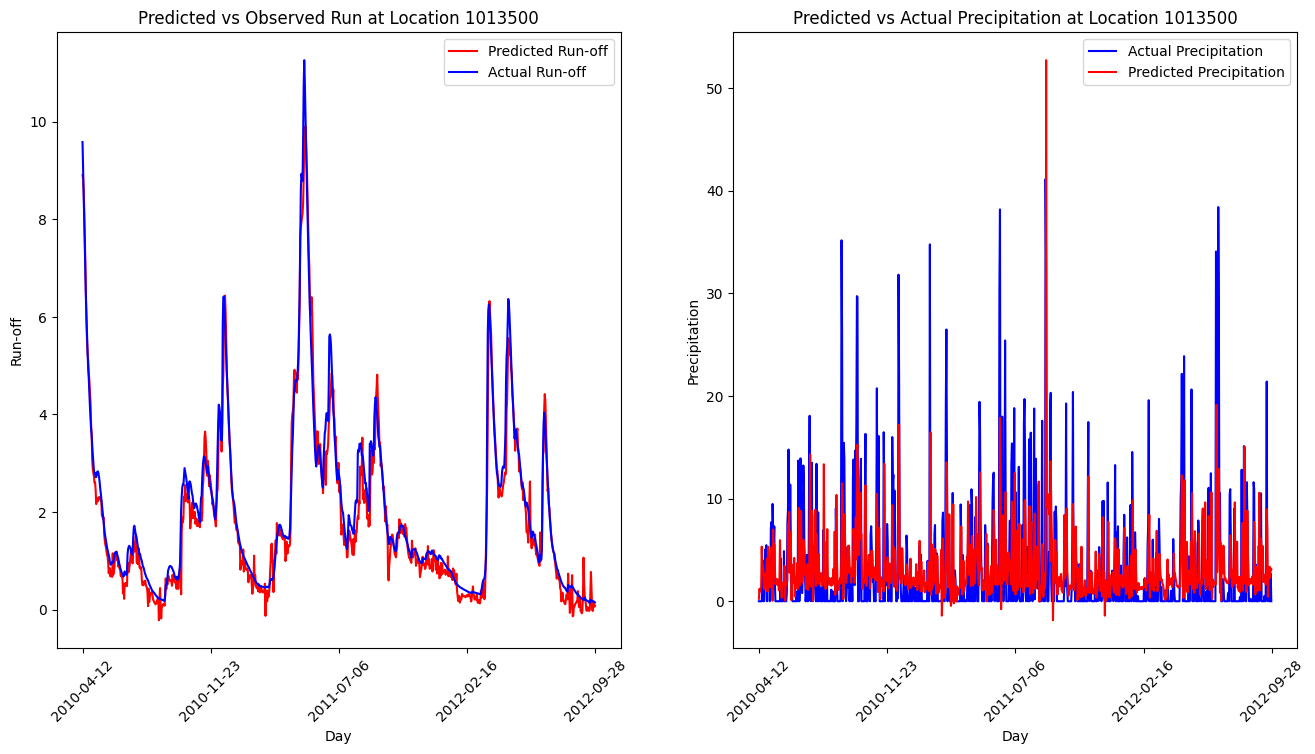

In [110]:
import matplotlib.pyplot as plt

# Defines the frame in which we can plot the predicted/actual values
start = 100
end = 1000

# Defines at which location should be plotted [0-27]
location_list = [item.split('.')[1] for item in new_df.columns[1:28]]
location_index = 0

# Define the plot size
plt.figure(figsize=(16, 8))

# Defines Ticker Date Displays
selected_dates = [ Y_test_dates.iloc[start], Y_test_dates.iloc[end], Y_test_dates.iloc[start + (end-start)//2], 
                  Y_test_dates.iloc[start + (end-start)//4], Y_test_dates.iloc[start + 3*(end-start)//4] ]

# Plots the run-off predictions and true values
plt.subplot(1, 2, 1)
plt.plot(Y_test_dates.iloc[start:end], Y_pred[start:end, 27+location_index], color='red', label="Predicted Run-off")
plt.plot(Y_test_dates.iloc[start:end], Y_test[start:end, 27+location_index], color='blue', label="Actual Run-off")
plt.xticks(selected_dates, rotation=45)
plt.xlabel('Day')
plt.ylabel('Run-off')
plt.title(f"Predicted vs Observed Run at Location {location_list[location_index]}")
plt.legend()

# Plots the precipitation predictions and true values
plt.subplot(1, 2, 2)
plt.plot(Y_test_dates.iloc[start:end], Y_test[start:end, location_index], color='blue', label="Actual Precipitation")
plt.plot(Y_test_dates.iloc[start:end], Y_pred[start:end, location_index], color='red', label="Predicted Precipitation")
plt.xticks(selected_dates, rotation=45)
plt.xlabel('Day')
plt.ylabel('Precipitation')
plt.title(f"Predicted vs Actual Precipitation at Location {location_list[location_index]}")
plt.legend()

plt.show()